<a href="https://colab.research.google.com/github/alexanderbonilla/UniAndes/blob/master/H0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy import diff
from matplotlib import pyplot as plt
#from sklearn.gaussian_process import GaussianProcess
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.misc import derivative

In [5]:
dataH = np.loadtxt('/Hz_2016.txt')
z = dataH[:,0]
H = dataH[:,1]
sigmaH = dataH[:,2]

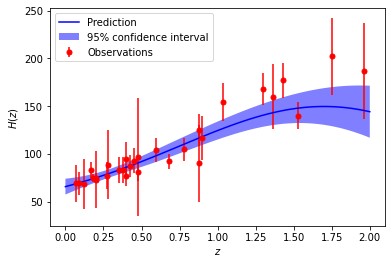

In [6]:
x = np.atleast_2d(np.linspace(0, 2, 100)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3))*RBF(10, (1e-2, 1e2))

X = z
X = np.atleast_2d(X).T

# Observations and noise
y = H
dy = sigmaH

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy**2,
                              n_restarts_optimizer=10).fit(X, y)

y_pred, sigma = gp.predict(x, return_std=True)


plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600*sigma,
                        (y_pred + 1.9600*sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(loc='upper left')

plt.show()

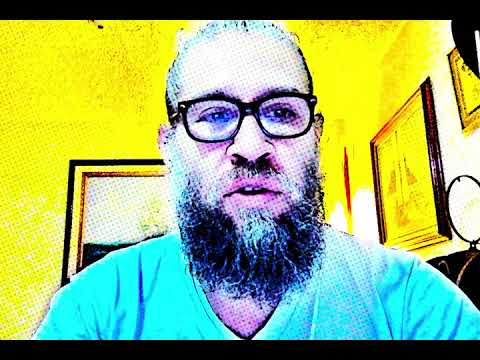

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('0AVelNgqd20')